<a href="https://colab.research.google.com/github/vietphtran/Data/blob/master/GROUP_1_Clean_And_Analyze_Employee_Exit_Surveys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clean And Analyze Employee Exit Surveys**

In this project, we will analyze the exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The two datasets can be downloaded via the following links:
- [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
- [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

The goal of this project is to help our stakeholders answer the following questions:

1. At which Career Stages are employees likely to resign due to dissatisfaction?
2. Which Age groups are more likely to resgin due to dissatisfaction?
3. Which Gender is more likely to resign due to dissatisfaction?
4. Which Institute has more resigned employees due to dissatisfaction?

## **Introduction**

Our first step is to read the datasets and do some initial explorations. 
Below is some basic information and a preview of some columns we'll work with from the two datasets:

1. data_survey: 56 columns with 822 entries.
    - ID: An id used to identify the participant of the survey
    - SeparationType: The reason why the person's employment ended
    - Cease Date: The year or month the person's employment ended
    - DETE Start Date: The year the person began employment with the DETE

2. tafe_survey: 72 columns with 702 entries.
    - Record ID: An id used to identify the participant of the survey
    - Reason for ceasing employment: The reason why the person's employment ended
    - LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)


In [1]:
# Import Pandas and NumPy libraries
import pandas as pd
import numpy as np

In [2]:
# Read the dataset into pandas dataframe and Explore the dataset
dete_survey = pd.read_csv("https://raw.githubusercontent.com/vietphtran/Data/master/dete_survey.csv")
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
# Read the dataset into pandas dataframe and Explore the dataset
tafe_survey = pd.read_csv("https://raw.githubusercontent.com/vietphtran/Data/master/tafe_survey.csv")
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

**Some initial observations:**

- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- dete_survey has boolean entries, tafe_survey has entries entered as strings
- Both the dete_survey and tafe_survey dataframes contain many columns that we might be irrelevant to our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.


## **Correct missing values and drop irrelevant columns**

We begin our data cleaning process with the first two tasks:
- Change the 'Not Stated' value to NaN value
- Drop columns that we don't need to complete our analysis: after reading through the column names of each dataset, we decide to drop the following columns:
    - dete_survey: column indexing from 28 to 48
    - tafe_survey: column indexing from 17 to 65



In [6]:
# Read the dataset into dataframe with "Not Stated" values read as NaN
dete_survey = pd.read_csv("https://raw.githubusercontent.com/vietphtran/Data/master/dete_survey.csv", na_values="Not Stated")

#Check the updated dataframe
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
# Check columns to be dropped
print(dete_survey.columns[28:49])
print(tafe_survey.columns[17:66])

# Drop columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Check the remained columns
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')
Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the j

## **Rename the columns**

In the next step, we find it essential to standardize the column names as our main goal of the data cleaning part is to be able to combine the two dataframes into one united dataframe. Below are some of the columns we think essential for our final analysis:

<table>
<tr>
<th>dete_survey</th>
<th>tafe_survey</th>
<th>Definition</th>
</tr>
<tr>
<td>ID</td>
<td>Record ID</td>
<td>An id used to identify the participant of the survey</td>
</tr>
<tr>
<td>SeparationType</td>
<td>Reason for ceasing employment</td>
<td>The reason why the participant's employment ended
</tr>
<tr>
<td>Cease Date</td>
<td>CESSATION YEAR</td>
<td>The year or month the participant's employment ended</td>
</tr>
<tr>
<td>DETE Start Date</td>
<td></td>
<td>The year the participant began employment with the DETE</td>
</tr>
<tr>
<td></td>
<td>LengthofServiceOverall.
<br>Overall Length of Service at Institute (in years)</td>
<td>The length of the person's employment (in years)</td>
</tr>
<tr>
<td>Age</td>
<td>CurrentAge.
<br>Current Age</td>
<td>The age of the participant</td>
</tr>
<tr>
<td>Gender</td>
<td>Gender.
<br>What is your Gender?</td>
<td>The gender of the participant</td>
</tr>
</table>

### **1. dete_survey**

We use the following criteria to update the column names:
- Make all the capitalization lowercase
- Remove any trailing whitespace from the end of the strings
- Replace spaces with underscores ('_')

In [8]:
# Display current column names
print("BEFORE")
print(dete_survey_updated.columns)

# Update column names based on the above criteria
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")

# Check the updated column names
print("\n")
print("AFTER")
print(dete_survey_updated.columns)

BEFORE
Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


AFTER
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_privat

### **2. tafe_survey**

This dataset requires more cleaning steps thus we begin with the obvious and easy ones first:
- 'Record ID': 'id'
- 'CESSATION YEAR': 'cease_date'
- 'Reason for ceasing employment': 'separationtype'
- 'Gender. What is your Gender?': 'gender'
- 'CurrentAge. Current Age': 'age'
- 'Employment Type. Employment Type': 'employment_status'
- 'Classification. Classification': 'position'
- 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
- 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

In [9]:
# Display current column names
print("BEFORE")
print(tafe_survey_updated.columns)

# Create a dictionary containing the new column names
tafe_column_new_names = {"Record ID": "id",
                         "CESSATION YEAR": "cease_date",
                         "Reason for ceasing employment": "separationtype",
                         "Gender. What is your Gender?": "gender",
                         "CurrentAge. Current Age": "age",
                         "Employment Type. Employment Type": "employment_status",
                         "Classification. Classification": "position",
                         "LengthofServiceOverall. Overall Length of Service at Institute (in years)": "institute_service",
                         "LengthofServiceCurrent. Length of Service at current workplace (in years)": "role_service"}

# Update column names based on the created dictionary
tafe_survey_updated.rename(tafe_column_new_names, axis=1, inplace=True)

# Check the updated column names
print("\n")
print("AFTER")
print(tafe_survey_updated.columns)

BEFORE
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dt

## **Filter the data (1): resigned employees**

As the project only focuses on **resigned** employees due to **dissatisfaction**, we need to filter the current dataframe based on these two main criteria. In this section, we will first select the entries based on the separation type of "Resignation".

First, we review the unique values in separationtype column in both the datasets

In [10]:
# Review the unique values in separationtype column in both the datasets 
print(dete_survey_updated["separationtype"].value_counts())
print("\n")
print(tafe_survey_updated["separationtype"].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


From the above results, we can see that the dete_survey_updated dataframe contains multiple separation types coded as 'Resignation':

- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

These types should be grouped into one separation type 'Resignation' since our project does not require to go deeper into each separation type.


In [11]:
# Update all separation types related to Resignation to one single type: Resignation
dete_survey_updated["separationtype"] = dete_survey_updated["separationtype"].str.split("-").str[0]
dete_survey_updated["separationtype"].value_counts()


Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

We then select only the data for survey respondents who have a Resignation separation type in both the dataframes as below.

In [12]:
# Select data points with Resignation in dete_survey
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"] == "Resignation"].copy()

# Select data points with Resignation in tafe_survey
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"] == "Resignation"].copy()

## **Verify the data**

We'll focus on verifying that the years in the cease_date and dete_start_date columns make sense and do not contain suspicious outliers

In [13]:
# Check the consistency of the date in cease_date
print(dete_resignations["cease_date"].value_counts())

# Select only the year in cease_date
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1].astype(float)

# Check the updated cease_date
print(dete_resignations["cease_date"].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


In [14]:
print("dete_resignations: dete_start_date")
print(dete_resignations["dete_start_date"].value_counts().sort_index(ascending=True))
print("\n")
print("dete_resignations: cease_date")
print(dete_resignations["cease_date"].value_counts().sort_index(ascending=True))
print("\n")
print("tafe_resignations: cease_date")
print(tafe_resignations["cease_date"].value_counts().sort_index(ascending=True))

dete_resignations: dete_start_date
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64


dete_resignations: cease_date
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64


tafe_resignations: cease_date
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


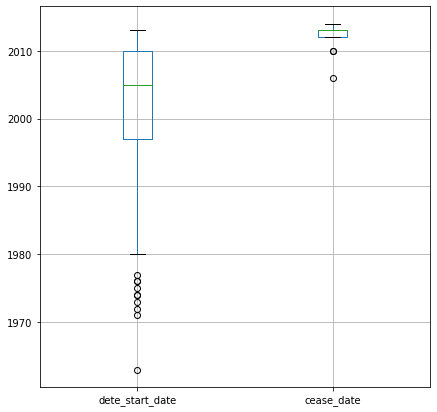

In [15]:
# Plot the cease and start years from dete_registration
dete_resignations[['dete_start_date','cease_date']].plot(kind='box', grid=True, figsize=(7,7))

Some observations from the above results:

* DETE has a wider range of the cease years than that of TAFE.
    - DETE: 2006 - 2014
    - TAFE: 2009 - 2013
* A large number of employees quitted  their jobs at DETE in 2012 and 2013, while at TAFE are from 2010 to 2012.
* There do not appear to be any major issues with the values. 


## **Create new column: institute_service**

Since our stakeholders want to know whether employees who work for the institutes for a short time are likely to resign due to dissatisfaction than employees who have been at the job longer, we need to analyze the service duration of the resigned employees. This is often referred as "years of service" in the Human Resources field.

While the tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service, the dete_resignations does not have sucha column. However, such information can be derived from the cease_date and dete_start_date columns.

Below, we create a new column in the dete_resignations dataframe that shows the year differences between the cease_date and dete_start_date columns.

In [16]:
# Create new column 'institute_service' in dete_resignations showing years of service
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

# Check the newly created column
dete_resignations["institute_service"].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## **Filter the data (2): dissatisfied employees**

In this section, we will finish our filtering task by categorizing employees as "dissatisfied" from each dataframe. Below are the criteria we use for the categorization:

1. tafe_survey_updated:
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction

2. dete_survey_updated:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. The new dissatisfied column will contain just the following values:

- True: indicates a person resigned because they were dissatisfied with the job
- False: indicates a person resigned because of a reason other than dissatisfaction with the job
- NaN: indicates the value is missing





In [17]:
# View the values in 'Contributing Factors. Dissatisfaction' in tafe_resignations
print(tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts())
print("\n")
# View the values in 'Contributing Factors. Job Dissatisfaction' in tafe_resignations
print(tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [18]:
# Write a function to update values to either True, False, or NaN
def update_vals(val):
  if pd.isnull(val):
    return np.nan
  elif val == "-":
    return False
  else:
    return True

In [19]:
# Create new column 'dissatisfied' in tafe_resignations
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the values of the new column
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [20]:
# Create new column 'dissatisfied' in dete_resignations
dete_resignations["dissatisfied"] = dete_resignations[["job_dissatisfaction",
                                                       "dissatisfaction_with_the_department",
                                                       "physical_work_environment",
                                                       "lack_of_recognition",
                                                       "lack_of_job_security",
                                                       "work_location",
                                                       "employment_conditions",
                                                       "work_life_balance",
                                                       "workload"]].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

# Check the values of the new column
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## **Combine the data**

Given the cleaning process done so far, we believe the two dataframes are ready to be combined without causing any major errors. We add a column to each dataframe to easily distinguish between the two once we combine them.

In [21]:
# Add a new column 'institute' for each dataframe
dete_resignations_up["institute"] = "PETE"
tafe_resignations_up["institute"] = "TAFE"

In [22]:
# Combine two dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Check the non-null values of the combined dataframe
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

From the info table above, there are still columns that are not relevant to our analysis. We decide to drop any columns with less than 500 non null values since the columns we need all have more than 500 non-null values. The updated dataframe is as below:

In [23]:
# Drop columns with fewer than 500 non null values
combined_updated = combined.dropna(thresh=500, axis=1).copy()

# Check the updated dataframe
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


## **Clean 'institute_service' column**
This column in the combined dataframe now has a mix of string and numeric values that make it impossible for us to carry out our analysis. In addition, the values are too granular that we doubt to get any insights from it. 

In [24]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
17.0                   6
10.0                   6
12.0                   6
14.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
19.0                   3
39.0                   3
32.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


Therefore, we think it is essential to group these numbers into categories. We'll base our analysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [25]:
# Extract the years of service to a new column
combined_updated['institute_service_up'] = combined_updated["institute_service"].astype('str').str.extract(r'(\d+)').astype('float')

# Create a function to categorize the years of service
def categorize_service(year):
  if year < 3:
    return "new"
  elif (year >=3) and (year <= 6):
    return "experienced"
  elif (year >=7) and (year <=10):
    return "established"
  elif pd.isnull(year):
    return np.nan
  else:
    return "veteran"

# Apply the newly created function to the column 'institute_service_up'
combined_updated["service_cat"] = combined_updated['institute_service_up'].apply(categorize_service)
combined_updated["service_cat"].value_counts(dropna=False)

new            193
experienced    172
veteran        136
NaN             88
established     62
Name: service_cat, dtype: int64

## **Fill in missing values**

When checking the values of the 'dissatisfied' column, we find that there are still missing values ('NaN') that need to be either dropped or filled in. We decide to treat these values as 'False' value, which means these employees did not resign due to dissatisfaction, given that if they were dissatisfied, they should have indicated so in the corresponding columns / answers.

In [26]:
# Check the current values of the 'dissatisfied' column
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [27]:
# Fill the missing values with the value 'False'
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

## **Some initial analyses of the data**

At this point, our dataframe is ready for some initial analyses to answer the questions posed by our stakeholders.



### **1. At which Career Stages are employees likely to resign due to dissatisfaction?**

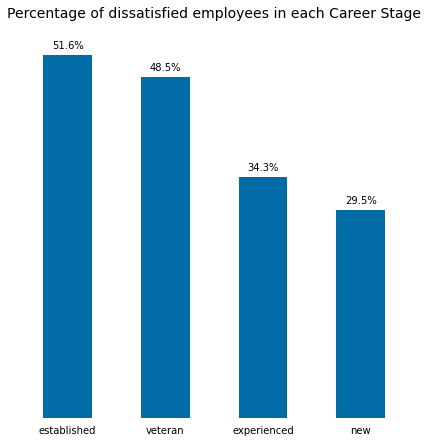

In [28]:
# Create pivot table
dis_pv_pct = combined_updated.pivot_table(index="service_cat", values="dissatisfied").sort_values("dissatisfied", ascending=False)

# Plot the newly created pivot table
%matplotlib inline
dis_pv_pct_fig = dis_pv_pct.plot(kind="bar", rot = 0, legend=False, color="#006ba4", xlabel="", figsize=(7, 7))

# Make up figure for better readability
## Add title
dis_pv_pct_fig.set_title("Percentage of dissatisfied employees in each Career Stage", pad=20, fontsize=14)
## Add value for each bar
x_value = pd.DataFrame(dis_pv_pct)["dissatisfied"]
for i in range(0,4):
  percentage = str(round(x_value[i]*100,1)) + "%"
  dis_pv_pct_fig.text(i, x_value[i]+0.01, percentage, horizontalalignment='center')
## Hide frame
for key, spine in dis_pv_pct_fig.spines.items():
  spine.set_visible(False)
## Hide y axis
dis_pv_pct_fig.get_yaxis().set_visible(False)
## Hide x ticks
dis_pv_pct_fig.tick_params(axis= "x", bottom=None)



**Findings:** employees with 7 or more years of service (Established and Veteran) are much more likely to resign due to dissatisfaction. One possible explanation is that these employees have rich working experience thus they have better chance at finding other jobs that provide higher job satisfaction than employees who are still in the early stages of their career.

### **2. Which Age groups are more likely to resgin due to dissatisfaction?**

Classify into four age groups:
- 24 or below
- From 25 to 39
- From 39 to 54
- 55 or above

In [30]:
# Check the current values of the column 'age'
combined_updated["age"].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [ ]:
# Convert values to string type
combined_updated["age"].astype("str")

# Create a function to group age values
def age_cat(age):
  if pd.isnull(age):
    return np.nan
  elif int(age[0:2]) <= 24:
    return "< 25"
  elif (int(age[0:2]) > 24) and (int(age[0:2]) < 40):
    return "25 - 39"
  elif (int(age[0:2]) >= 40) and (int(age[0:2]) <= 54):
    return "40 - 54"
  elif int(age[0:2]) > 55:
    return "> 54"
  else:
    return "25 - 54"

# Apply the function and create a new column 'age_group'
combined_updated["age_group"] = combined_updated["age"].apply(age_cat)

combined_updated["age_group"].value_counts(dropna=False)

40 - 54    245
25 - 39    201
> 54        78
< 25        72
NaN         55
Name: age_group, dtype: int64

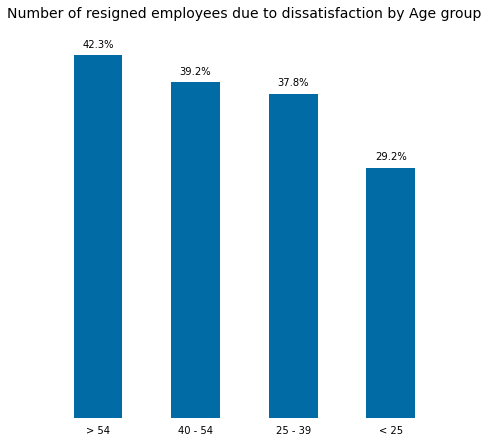

In [36]:
# Create pivot table
dis_pv_age = combined_updated.pivot_table(index="age_group", values="dissatisfied").sort_values("dissatisfied", ascending=False)

# Plot the newly created pivot table
dis_pv_age_fig = dis_pv_age.plot(kind="bar", rot = 0, legend=False, color="#006ba4", xlabel="", figsize=(7, 7))

# Make up figure for better readability
## Add title
dis_pv_age_fig.set_title("Percentage of resigned employees due to dissatisfaction by Age group", pad=20, fontsize=14)
## Add value for each bar
x_value = pd.DataFrame(dis_pv_age)["dissatisfied"]
for i in range(0,4):
  percentage = str(round(x_value[i]*100,1)) + "%"
  dis_pv_age_fig.text(i, x_value[i]+0.01, percentage, horizontalalignment='center')
## Hide frame
for key, spine in dis_pv_age_fig.spines.items():
  spine.set_visible(False)
## Hide y axis
dis_pv_age_fig.get_yaxis().set_visible(False)
## Hide x ticks
dis_pv_age_fig.tick_params(axis= "x", bottom=None)



**Findings:** the older the employees are, the more likely they are to resign due to dissatisfaction. This finding is relatively in accordance with the finding in the previous section since older employees tend to have more working experience, thus having better chance at finding new jobs.

### **3. Which Gender is more likely to resign due to dissatisfaction?**

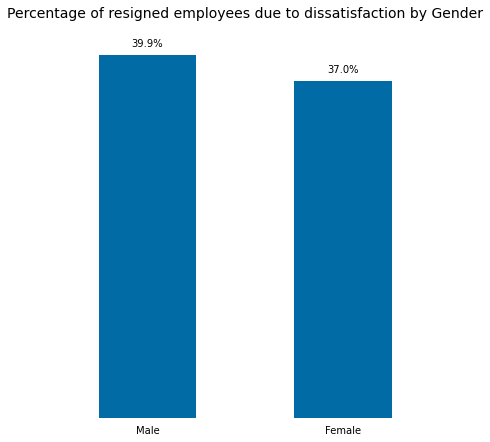

In [42]:
# Create pivot table
gender_pct = combined_updated.pivot_table(index="gender", values="dissatisfied").sort_values("dissatisfied", ascending=False)

# Plot the newly created pivot table
gender_pct_fig = gender_pct.plot(kind="bar", rot = 0, legend=False, color="#006ba4", xlabel="", figsize=(7, 7))

# Make up figure for better readability
## Add title
gender_pct_fig.set_title("Percentage of resigned employees due to dissatisfaction by Gender", pad=20, fontsize=14)
## Add value for each bar
x_value = pd.DataFrame(gender_pct)["dissatisfied"]
for i in range(0,2):
  percentage = str(round(x_value[i]*100,1)) + "%"
  gender_pct_fig.text(i, x_value[i]+0.01, percentage, horizontalalignment='center')
## Hide frame
for key, spine in gender_pct_fig.spines.items():
  spine.set_visible(False)
## Hide y axis
gender_pct_fig.get_yaxis().set_visible(False)
## Hide x ticks
gender_pct_fig.tick_params(axis= "x", bottom=None)



**Findings:** The rates of resignation due to dissatisfaction of both male and female employees are about the same, though dissatisfied male employees seems to more likely to resign than their female counterparts.

### **4. Which Institute has more resigned employees due to dissatisfaction?**

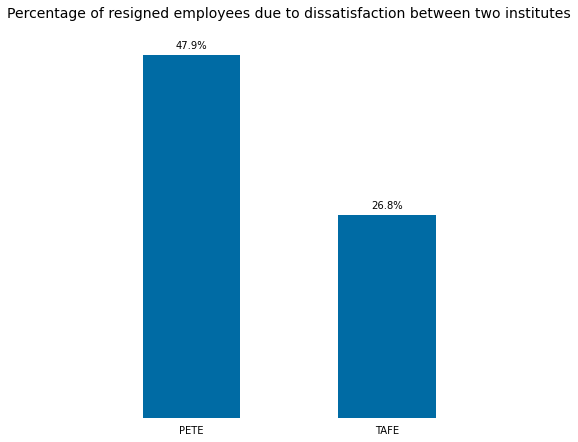

In [40]:
# Create pivot table
inst_pct = combined_updated.pivot_table(index="institute", values="dissatisfied").sort_values("dissatisfied", ascending=False)

# Plot the newly created pivot table
inst_pct_fig = inst_pct.plot(kind="bar", rot = 0, legend=False, color="#006ba4", xlabel="", figsize=(7, 7))

# Make up figure for better readability
## Add title
inst_pct_fig.set_title("Percentage of resigned employees due to dissatisfaction between two institutes", pad=20, fontsize=14)
## Add value for each bar
x_value = pd.DataFrame(inst_pct)["dissatisfied"]
for i in range(0,2):
  percentage = str(round(x_value[i]*100,1)) + "%"
  inst_pct_fig.text(i, x_value[i]+0.01, percentage, horizontalalignment='center')
## Hide frame
for key, spine in inst_pct_fig.spines.items():
  spine.set_visible(False)
## Hide y axis
inst_pct_fig.get_yaxis().set_visible(False)
## Hide x ticks
inst_pct_fig.tick_params(axis= "x", bottom=None)



**Findings:** Dissatisfied employees who work for PETE are significantly more likely to resign than those who work for TAFE.

## **Conclusion**
Based on the findings from our analysis, we believe that a **male** employee who is about **55 or older** and has been **working for PETE** for **more than 7 years** is the most likely to resign due to some kind of dissatisfaction.